# 2021-08-25 Finite Difference Intro

## Last time
* General shape of PDE solvers and stakeholders
* Comparing/plotting cost and accuracy
* Learning strategy

## Today
* Evaluating derivatives
* Taylor series and truncation error
* Stability

# Consider the boundary value problem: find $u$:

\begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b .
\end{gather}

We say
* $f(x)$ is the "forcing"
* the left boundary condition is Dirichlet
* the right boundary condition is Neumann

We need to choose
* how to represent $u(x)$, including evaluating it on the boundary,
* how to compute derivatives of $u$,
* in what sense to ask for the differential equation to be satisfied,
* where to evaluate $f(x)$ or integrals thereof,
* how to enforce boundary conditions.

# Finite Difference/collocation approach to solve $u$:

\begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b .
\end{gather}

* Represent the function $u(x)$ by its values $u_i = u(x_i)$ at a discrete set of points $$ -1 = x_1 < x_2 < \dotsb < x_n = 1 . $$
  * The FD framework does not uniquely specify the solution values at other points
* Compute derivatives at $x_i$ via differencing formulas involving a finite number of neighbor points (independent of the total number of points $n$).
* FD methods ask for the differential equation to be satisfied pointwise at each $x_i$ in the interior of the domain.
* Evaluate the forcing term $f$ pointwise at $x_i$.
* Approximate derivatives at discrete boundary points ($x_n = 1$ above), typically using one-sided differencing formulas.

# Computing a derivative

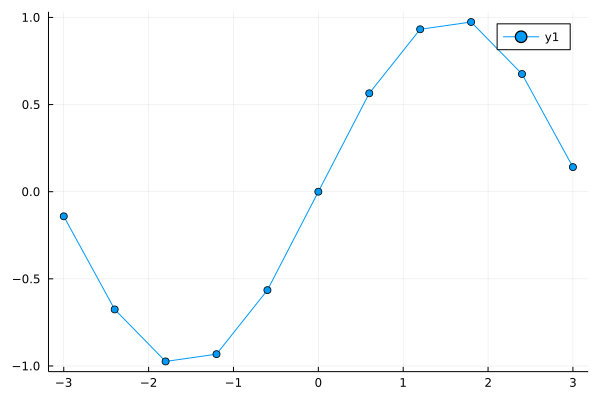

In [16]:
using Plots

n = 11
h = 6 / (n - 1)
x = LinRange(-3, 3, n)
u = sin.(x)

plot(x, u, marker=:circle)

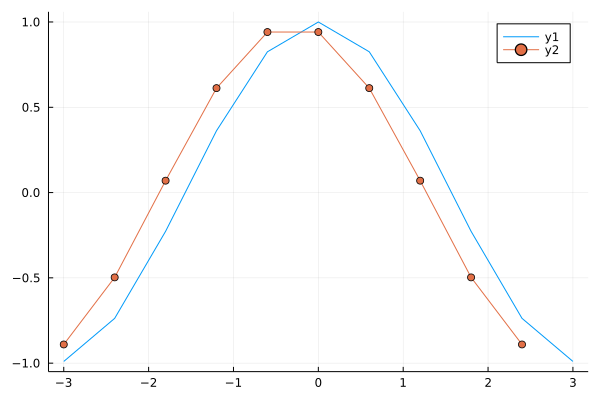

In [20]:
u_x = cos.(x)
fd_u_x = (u[2:end] - u[1:end-1]) / h

plot(x, u_x)
plot!(x[1:end-1], fd_u_x, marker=:circle)

# How accurate is it?

Without loss of generality, we'll approximate $u'(x_i = 0)$, taking $h = x_{i+1} - x_i$.

$$ u(x) = u(0) + u'(0)x + u''(0)x^2/2! + O(x^3)$$
and substitute into the differencing formula
$$ \begin{split} u'(0) \approx \frac{u(h) - u(0)}{h} = h^{-1} \Big( u(0) + u'(0) h + u''(0)h^2/2 + O(h^3) - u(0) \Big) \\
= u'(0) + u''(0)h/2 + O(h^2) . \end{split}$$
Evidently the error in this approximation is $u''(0)h/2 + O(h^2)$. We say this method is *first order accurate*.

# Activity on stability and accuracy computing derivatives